## Data Preprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from src.dataProcessor.DataProcessor import DataProcessor
from src.utils.util import *

In [2]:
df = pd.read_csv("../data/multiclass1.csv")
df.shape
# df_oot=pd.read_csv('../df_oot.csv',index_col=0)
# df.shape,df_oot.shape

(268167, 87)

In [3]:
df.head()

,Abuse__DOT__completed_afn_orders_by_customer_marketplace__DOT__n_afn_unit_amount_last_365_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_90_days,Abuse__DOT__cluster_edx_intransit_by_customer_marketplace_na__DOT__n_cluster_max_intransit_si_last_180_days,Abuse__DOT__cluster_nonsellable_returns_by_customer_marketplace__DOT__n_cluster_nsr_unit_count_last_90_days,payment_risk__DOT__customer_contacts_by_customerid_precomp_region__DOT__n_customer_contact_by_phone_cnt_30d,Abuse__DOT__cluster_mfn_refunds_by_customer_marketplace__DOT__n_cluster_mfn_refund_unit_amount_last_180_days,ORDER_TOTAL,Abuse__DOT__cluster_completed_afn_orders_by_customer_marketplace__DOT__n_cluster_afn_unit_count_last_90_days,Abuse__DOT__notr_forwardlooking_si_by_customer_marketplace__DOT__n_notr_forwardlooking_si_last_180_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_365_days,...,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_30_days,marketplacId,is_abuse,condition,e90,ce90,conc,si90,csi90,multiclass
0,75131.53,0.000000,0.00,0,0,0.0,74.00,20,0.003143,0.000000,...,0.000000,33,1,1,0,0,0,0.0,0.0,condition
1,12384.60,0.112823,0.00,1,0,0.0,1500.25,17,0.121512,0.089448,...,0.134226,33,0,0,0,0,0,0.0,0.0,neg
2,733.00,0.000000,0.00,0,0,0.0,209.00,3,0.291899,0.000000,...,0.000000,33,0,0,0,0,0,0.0,0.0,neg
3,882.36,0.052124,0.00,2,0,0.0,599.99,7,0.491324,0.031178,...,0.000000,15,0,0,0,0,0,0.0,0.0,neg
4,3599.98,0.270178,8.17,2,0,0.0,15.99,45,0.021619,0.232532,...,0.365031,15,0,0,0,0,0,0.0,0.0,neg


In [15]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)
df_train.shape, df_test.shape

((241350, 87), (26817, 87))

In [16]:
label_cols = ["is_abuse", "condition", "e90", "ce90", "conc", "si90", "csi90"]
label_col_multiclass = "multiclass"

train_cols = []
for i in df_train.columns:
    if i != label_col_multiclass and i not in label_cols:
        train_cols.append(i)
len(train_cols)

79

In [ ]:
Y_train_mc = df_train[label_col_multiclass]

In [24]:
df_train[label_col_multiclass].value_counts()

multiclass
neg          200411
condition     22291
si90          12057
conc           4844
e90            1068
ce90            383
csi90           296
Name: count, dtype: int64

In [28]:
df_train["Abuse_type"] = np.where(
    df_train[label_col_multiclass] == "neg",
    0,
    np.where(
        df_train[label_col_multiclass] == "condition",
        1,
        np.where(
            df_train[label_col_multiclass] == "si90",
            2,
            np.where(
                df_train[label_col_multiclass] == "conc",
                3,
                np.where(
                    df_train[label_col_multiclass] == "e90",
                    4,
                    np.where(df_train[label_col_multiclass] == "ce90", 5, 6),
                ),
            ),
        ),
    ),
)
df_train["Abuse_type"].value_counts()

Abuse_type
0    200411
1     22291
2     12057
3      4844
4      1068
5       383
6       296
Name: count, dtype: int64

In [29]:
df_test["Abuse_type"] = np.where(
    df_test[label_col_multiclass] == "neg",
    0,
    np.where(
        df_test[label_col_multiclass] == "condition",
        1,
        np.where(
            df_test[label_col_multiclass] == "si90",
            2,
            np.where(
                df_test[label_col_multiclass] == "conc",
                3,
                np.where(
                    df_test[label_col_multiclass] == "e90",
                    4,
                    np.where(df_test[label_col_multiclass] == "ce90", 5, 6),
                ),
            ),
        ),
    ),
)
df_test["Abuse_type"].value_counts()

Abuse_type
0    22199
1     2468
2     1353
3      596
4      124
5       43
6       34
Name: count, dtype: int64

In [30]:
X_train = df_train[train_cols]
Y_train_mc = df_train["Abuse_type"]
X_test = df_test[train_cols]
Y_test_mc = df_test["Abuse_type"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((241350, 79), (241350,), (26817, 79), (26817,))

In [31]:
import xgboost

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# details about make_multilabel_classification could be checked here
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_multilabel_classification.html


# Assuming X and y are your feature matrix and target variable


# XGBoost parameters with GPU support
# Training the XGBoost model
num_rounds = 100


# Creating a DMatrix for XGBoost
# dtrain = xgboost.DMatrix(X, label=y,enable_categorical=True)
# doot = xgboost.DMatrix(X_oot, label=y_oot,enable_categorical=True)

xgb_model = xgboost.XGBClassifier(
    objective="multi:softproba",
    eval_metric="mlogloss",
    tree_method="hist",
    device="cuda",
    enable_categorical=True,
)
xgb_model.fit(X_train, Y_train_mc)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:08:47] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=True, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
preds = xgb_model.predict_proba(X_test)

In [46]:
preds

array([[9.3698537e-01, 2.9974796e-02, 2.0700270e-02, ..., 9.4166677e-04,
        1.6831879e-04, 1.1373779e-04],
       [8.8218945e-01, 6.6670850e-02, 4.1542292e-02, ..., 2.8315827e-04,
        5.9339389e-05, 2.9142486e-04],
       [9.0857738e-01, 1.9820500e-02, 2.8481094e-02, ..., 7.7222660e-04,
        2.2010021e-03, 5.1221997e-04],
       ...,
       [5.8561337e-01, 3.6131653e-01, 1.3659383e-02, ..., 5.8135008e-03,
        7.2658155e-04, 2.1765926e-03],
       [6.6443592e-01, 2.9431987e-01, 2.0785367e-02, ..., 7.8975763e-03,
        2.7767540e-04, 1.9274563e-05],
       [8.2909226e-01, 5.7954673e-02, 9.6207939e-02, ..., 6.7730965e-03,
        4.9960520e-04, 1.2271748e-04]], dtype=float32)

In [55]:
df_test_xgb_pred = pd.DataFrame()
df_test_xgb_pred["Abuse_type"] = df_test.Abuse_type
df_test_xgb_pred["neg_xgb_pred"] = preds[:, 0]
df_test_xgb_pred["condition_xgb_pred"] = preds[:, 1]
df_test_xgb_pred["si90_xgb_pred"] = preds[:, 2]
df_test_xgb_pred["conc_xgb_pred"] = preds[:, 3]
df_test_xgb_pred["e90_xgb_pred"] = preds[:, 4]
df_test_xgb_pred["ce90_xgb_pred"] = preds[:, 5]
df_test_xgb_pred["csi90_xgb_pred"] = preds[:, 6]
df_test_xgb_pred = df_test_xgb_pred.reset_index(drop=True)
df_test_xgb_pred.head()

,Abuse_type,neg_xgb_pred,condition_xgb_pred,si90_xgb_pred,conc_xgb_pred,e90_xgb_pred,ce90_xgb_pred,csi90_xgb_pred
0,0,0.936985,0.029975,0.020700,0.011116,0.000942,0.000168,0.000114
1,0,0.882189,0.066671,0.041542,0.008964,0.000283,0.000059,0.000291
2,0,0.908577,0.019821,0.028481,0.039636,0.000772,0.002201,0.000512
3,0,0.301171,0.414182,0.226427,0.051893,0.005753,0.000381,0.000192
4,0,0.899858,0.045766,0.045637,0.008205,0.000440,0.000064,0.000029


In [56]:
df_test_xgb_pred.shape

(26817, 8)

In [57]:
df_test_xgb_pred.to_csv("df_test_xgb_pred.csv", index=False)

In [44]:
df_test_xgb_pred.neg_xgb_pred.value_counts()

neg_xgb_pred
0    26333
1      369
2       72
4       17
3       14
5       10
6        2
Name: count, dtype: int64

In [40]:
df_test_xgb_pred = pd.DataFrame()
df_test_xgb_pred["Abuse_type"] = df_test.Abuse_type
df_test_xgb_pred["neg_xgb_pred"] = np.where()

In [ ]:
df_test["Abuse_type"] = np.where(
    df_test[label_col_multiclass] == "neg",
    0,
    np.where(
        df_test[label_col_multiclass] == "condition",
        1,
        np.where(
            df_test[label_col_multiclass] == "si90",
            2,
            np.where(
                df_test[label_col_multiclass] == "conc",
                3,
                np.where(
                    df_test[label_col_multiclass] == "e90",
                    4,
                    np.where(df_test[label_col_multiclass] == "ce90", 5, 6),
                ),
            ),
        ),
    ),
)
df_test["Abuse_type"].value_counts()

In [39]:
len(preds)

26817

## Baseline Single Lgb Models （ignore it for now）

In [9]:
#!pip install lightgbm

In [11]:
from src.model.LgbBaseline import LgbBaseline

In [17]:
params = {
    "metric": "auc",
    "max_depth": 16,
    "learning_rate": 0.05,
    "bagging_fraction": 0.9,
    "feature_fraction": 0.9,
    "verbose": -1,
    "lambda_l1": 0.5,
    "lambda_l2": 0.05,
    "num_leaves": 500,
    "min_child_weight": 0.1,
    "min_data_in_leaf": 25,
    "num_threads": 75,
    "metric_freq": 10,
    "data_random_seed": 17,
    "objective": "binary",
}

In [20]:
base = LgbBaseline(X_train, Y_train, X_test, Y_test, params)

AttributeError: 'DataFrame' object has no attribute 'paymeth'

In [33]:
base.baseline_model()

Overall lgb result: 
[50]	valid_0's auc: 0.975465
[100]	valid_0's auc: 0.980027
[150]	valid_0's auc: 0.982117
[200]	valid_0's auc: 0.983303
[250]	valid_0's auc: 0.984009
[300]	valid_0's auc: 0.9845
[350]	valid_0's auc: 0.984846
[400]	valid_0's auc: 0.985111
[450]	valid_0's auc: 0.985315
[500]	valid_0's auc: 0.985475
[550]	valid_0's auc: 0.985598
[600]	valid_0's auc: 0.985698
[650]	valid_0's auc: 0.985779
[700]	valid_0's auc: 0.985854
[750]	valid_0's auc: 0.985924
[800]	valid_0's auc: 0.985976
[850]	valid_0's auc: 0.986035
[900]	valid_0's auc: 0.986092
[950]	valid_0's auc: 0.986132
[1000]	valid_0's auc: 0.98618
test metrics: 0.986146307461053 0.125007021152576 0.9695490617646836
CC single lgb result: 
[50]	valid_0's auc: 0.97512
[100]	valid_0's auc: 0.979488
[150]	valid_0's auc: 0.981405
[200]	valid_0's auc: 0.982323
[250]	valid_0's auc: 0.982841
[300]	valid_0's auc: 0.983166
[350]	valid_0's auc: 0.983391
[400]	valid_0's auc: 0.983545
[450]	valid_0's auc: 0.983646
[500]	valid_0's auc: 0

## Weighted MTGBM with KD Loss Implementation

In [11]:
# ---- This chunck is for reloading updated classes when you want to change parameters in model or objective function.

import importlib
import src

importlib.reload(src.lossFunction.customLossKDswap)
importlib.reload(src.model.Mtgbm)

AttributeError: module 'src' has no attribute 'lossFunction'

In [12]:
import os

In [13]:
os.getcwd()

'/home/ec2-user/SageMaker/SecureAISandbox-CodeCommitRepository-shemingx-us-east-1/Multitask_learning/PFOC/mtgbm'

In [14]:
from src.lossFunction.customLossKDswap import custom_loss_KDswap
from src.model.Mtgbm import MtGbm

In [185]:
# pip install wheel

In [186]:
# pip install lightgbm

In [10]:
Y_train.shape[1] - 1

IndexError: tuple index out of range

In [8]:
mt_params = {
    "objective": "custom",
    "num_labels": Y_train.shape[1] - 1,
    "tree_learner": "serial2",
    "boosting": "gbdt",
    "max_depth": 16,
    "learning_rate": 0.05,  # 0.03
    "bagging_fraction": 0.9,
    "feature_fraction": 0.9,
    "verbosity": 1,
    "lambda_l1": 0.5,
    "lambda_l2": 0.05,
    "num_leaves": 750,  # 750,
    "min_child_weight": 0.1,
    "min_data_in_leaf": 100,  # 100,
    "num_threads": 80,
    "metric_freq": 10,
    "data_random_seed": 17,
    "verbose_eval": 50,
    "num_rounds": 200,
    #           'early_stopping_rounds': -1
}
main_target = "is_abuse"
targets = ["condition", "e90", "ce90", "conc", "si90", "csi90"]

IndexError: tuple index out of range

In [9]:
mtg = MtGbm(
    mt_params, X_train, Y_train, X_test, Y_test, main_target, targets, "auto_weight_KD"
)

NameError: name 'MtGbm' is not defined

### Model training

In [ ]:
mtg.train()

Training set size:  (241350, 79)
Training main task shape:  241350  Training sub tasks shape:  (241350, 6)
[LightGBM] [Info] Length of label is not same with #data
[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Info] Total Bins 11796
[LightGBM] [Info] Number of data points in the train set: 217215, number of used features: 67
[LightGBM] [Info] Length of label is not same with #data
[LightGBM] [Warning] Using self-defined objective function
--- task eval score:  [0.6903 0.7434 0.7234 0.753  0.6629 0.6363 0.6426]
--- self_eval score:  -0.6909
--- task eval score:  [0.7008 0.7498 0.7708 0.7201 0.6815 0.6498 0.6253]
--- self_eval score:  -0.7006
--- task eval score:  [0.7044 0.7548 0.7845 0.7577 0.6837 0.6593 0.652 ]
--- self_eval score:  -0.7065
--- task eval score:  [0.7056 0.7566 0.8059 0.7935 0.6937 0.6645 0.6545]
--- self_eval score:  -0.7101
--- task eval score:  [0.7094 0.7585 0.8144 0.7965 0.6946 0.6647 0.6859]
--- self_eval score:  -0.7146
--- task eval sco

Training set size:  (3014347, 348)
Training main task shape:  3014347  Training sub tasks shape:  (3014347, 5)
--- task eval score:  [0.9351 0.9255 0.8276 0.9172 0.8537 0.9224]
--- task eval score:  [0.9388 0.9279 0.8403 0.9186 0.8656 0.9267]
--- task eval score:  [0.9405 0.9283 0.8521 0.9201 0.8677 0.9288]
--- task eval score:  [0.9411 0.9287 0.8541 0.9205 0.877  0.9309]
--- task eval score:  [0.9418 0.9299 0.8547 0.921  0.8772 0.9312]
--- task eval score:  [0.9421 0.9303 0.854  0.9212 0.8778 0.9319]
--- task eval score:  [0.9426 0.9311 0.8544 0.9216 0.8807 0.9331]
--- task eval score:  [0.943  0.9314 0.8545 0.9221 0.8804 0.934 ]
--- task eval score:  [0.9433 0.9319 0.8565 0.9225 0.8811 0.9343]
--- task eval score:  [0.9434 0.9321 0.8585 0.9239 0.8823 0.9348]
--- task eval score:  [0.9436 0.9324 0.861  0.924  0.8823 0.9355]
--- task eval score:  [0.9439 0.9326 0.8622 0.9246 0.8844 0.9359]
--- task eval score:  [0.9441 0.9327 0.863  0.9249 0.8846 0.9362]
--- task eval score:  [0.9444 0

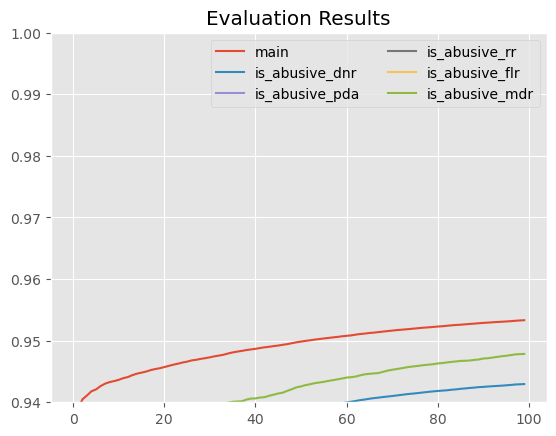

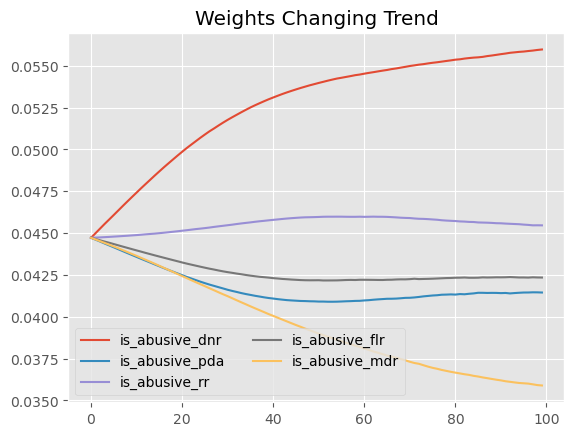

In [12]:
mtg.train()

### Model prediction

In [25]:
mtg.predict()

Test set size:  (334928, 348)
Test main task shape:  334928  Test sub tasks shape:  (334928, 5)
inner_predict 2009568
main task test metrics:  AUC  0.9568599695369935  logloss  0.24810629474727205  f1 score  0.8579571183462189


In [72]:
mtg.predict()

Test set size:  (334928, 348)
Test main task shape:  334928  Test sub tasks shape:  (334928, 5)
inner_predict 2009568
main task test metrics:  AUC  0.9525248859027033  logloss  0.26403032238114094  f1 score  0.8492427747833373


In [13]:
mtg.predict()

Test set size:  (334928, 348)
Test main task shape:  334928  Test sub tasks shape:  (334928, 5)
inner_predict 2009568
main task test metrics:  AUC  0.9534722019856692  logloss  0.2595711336260785  f1 score  0.8510244877561219


In [91]:
mtg.df_pred

,Overall,is_abusive_dnr,is_abusive_pda,is_abusive_rr,is_abusive_flr,is_abusive_mdr
0,0.844243,0.503762,0.061895,0.370389,0.060254,0.042655
1,0.044403,0.041259,0.041829,0.040600,0.042031,0.041366
2,0.525519,0.305422,0.092852,0.086877,0.122161,0.064364
3,0.046373,0.041967,0.042156,0.040967,0.042019,0.042447
4,0.883521,0.070026,0.068641,0.058627,0.424487,0.481896
...,...,...,...,...,...,...
334923,0.721631,0.050075,0.050921,0.058885,0.155260,0.602166
334924,0.058909,0.053357,0.047391,0.041919,0.043648,0.042930
334925,0.242851,0.057196,0.056446,0.046709,0.126480,0.119481
334926,0.826288,0.472722,0.066643,0.411290,0.063308,0.041546


In [26]:
df_oot_pred = df_oot[
    [
        "objectId",
        "is_abusive",
        "is_abusive_dnr",
        "is_abusive_pda",
        "is_abusive_rr",
        "is_abusive_flr",
        "is_abusive_mdr",
    ]
]
df_oot_pred.shape

(334928, 7)

In [27]:
df_oot_pred = df_oot_pred.reset_index(drop=True)
df_oot_pred.head()

,objectId,is_abusive,is_abusive_dnr,is_abusive_pda,is_abusive_rr,is_abusive_flr,is_abusive_mdr
0,202-8262441-5802766,1,1,0,0,0,0
1,406-1761894-1062727,0,0,0,0,0,0
2,204-0744829-2307565,1,1,0,0,1,0
3,408-6736154-8417960,0,0,0,0,0,0
4,407-3314239-7617128,1,0,0,0,1,0


In [28]:
df_oot_pred["is_abusive_pred"] = mtg.df_pred["Overall"]
df_oot_pred["is_abusive_dnr_pred"] = mtg.df_pred["is_abusive_dnr"]
df_oot_pred["is_abusive_pda_pred"] = mtg.df_pred["is_abusive_pda"]
df_oot_pred["is_abusive_rr_pred"] = mtg.df_pred["is_abusive_rr"]
df_oot_pred["is_abusive_flr_pred"] = mtg.df_pred["is_abusive_flr"]
df_oot_pred["is_abusive_mdr_pred"] = mtg.df_pred["is_abusive_mdr"]
df_oot_pred.shape

(334928, 13)

In [29]:
df_oot_pred.head()

,objectId,is_abusive,is_abusive_dnr,is_abusive_pda,is_abusive_rr,is_abusive_flr,is_abusive_mdr,is_abusive_pred,is_abusive_dnr_pred,is_abusive_pda_pred,is_abusive_rr_pred,is_abusive_flr_pred,is_abusive_mdr_pred
0,202-8262441-5802766,1,1,0,0,0,0,0.895714,0.516181,0.016644,0.378956,0.013600,0.002137
1,406-1761894-1062727,0,0,0,0,0,0,0.001292,0.000615,0.000584,0.000176,0.001176,0.000491
2,204-0744829-2307565,1,1,0,0,1,0,0.649261,0.401826,0.036094,0.026021,0.070385,0.013777
3,408-6736154-8417960,0,0,0,0,0,0,0.001163,0.000573,0.000766,0.000230,0.000913,0.000609
4,407-3314239-7617128,1,0,0,0,1,0,0.985743,0.014300,0.017225,0.009991,0.536775,0.751411


In [30]:
df_oot_pred.to_csv("df_oot_pred.csv", index=False)

In [31]:
Y_test.head()

,is_abusive,is_abusive_dnr,is_abusive_pda,is_abusive_rr,is_abusive_flr,is_abusive_mdr
497935,1,1,0,0,0,0
3954074,0,0,0,0,0,0
1845191,1,1,0,0,1,0
4477164,0,0,0,0,0,0
2291084,1,0,0,0,1,0


### Evaluate prediction results 

In [14]:
mtg.evaluate()

AttributeError: 'MtGbm' object has no attribute 'idx_test_dic'